In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import math

H05USB=pd.read_csv('/export/data/imizuno/Python_Analysis/wvmmatched/wvmmatched_H05USB.txt', index_col=0)

['utdate',
 'obsnum',
 'subsysnr',
 'lofreq',
 'iffreq',
 'rffreq',
 'time',
 'trx',
 'tsys',
 'utc',
 'utc_rough',
 'tau225',
 'airmass',
 'azimuth',
 'taurffreq']

In [25]:
print(list(H05USB))

['utdate', 'obsnum', 'subsysnr', 'lofreq', 'iffreq', 'rffreq', 'time', 'trx', 'tsys', 'utc', 'utc_rough', 'tau225', 'airmass', 'azimuth', 'taurffreq']


In [22]:
print('max=',max(H05USB.utdate), 'min=',min(H05USB.utdate))

max= 20180904 min= 20180110


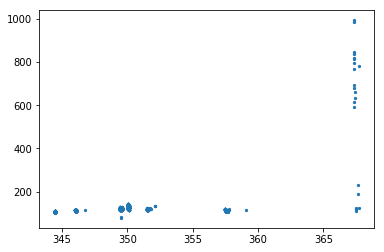

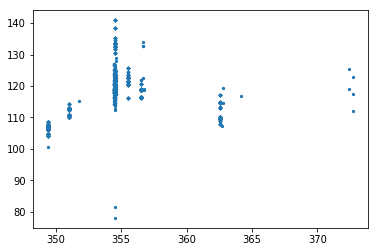

In [2]:
#plt.scatter(H05USB.lofreq[H05USB.trx>400], H05USB.trx[H05USB.trx>400], s=5)
#plt.show()
plt.scatter(H05USB.lofreq, H05USB.trx, s=5)
plt.show()
plt.scatter(H05USB.rffreq[H05USB.trx<160], H05USB.trx[H05USB.trx<160], s=5)
plt.show()

In [3]:
from scipy.interpolate import *
from numpy import *
%matplotlib inline

In [4]:
H05USB = H05USB[H05USB.trx<160].sort_values('iffreq')

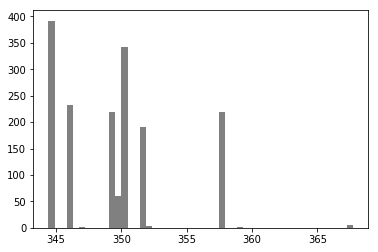

In [5]:
_hist=plt.hist(H05USB.lofreq,bins=50, color='grey')

In [6]:
x=array([0,1,2,3,4,5])
y=array([0, 0.8, 0.9 ,0.1, -0.8, -1])
polyfit(x,y,1)

array([-0.30285714,  0.75714286])

In [7]:
p1=polyfit(H05USB.lofreq, H05USB.trx, 1)

In [8]:
print(p1)

[  0.59150284 -90.68612782]


In [9]:
p2=polyfit(H05USB.lofreq, H05USB.trx, 2)
p3=polyfit(H05USB.lofreq, H05USB.trx, 3)

In [10]:
print(p2)

[-2.32625611e-01  1.63925443e+02 -2.87563569e+04]


In [11]:
print(p3)

[ 2.07610783e-02 -2.21918350e+01  7.90486042e+03 -9.38209859e+05]


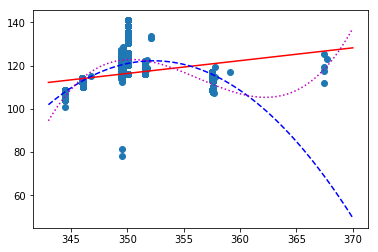

In [12]:
plt.plot(H05USB.lofreq, H05USB.trx,'o')
xp=linspace(343, 370, 100)
plt.plot(xp, polyval(p1, xp),'r-')
plt.plot(xp, polyval(p2, xp),'b--')
plt.plot(xp, polyval(p3, xp),'m:')

In [13]:
sort(H05USB.lofreq[1:10])

array([350.0351619, 350.0351619, 350.0351619, 350.0351619, 350.0351619,
       350.0351619, 350.0351619, 350.0351619, 350.0351619])

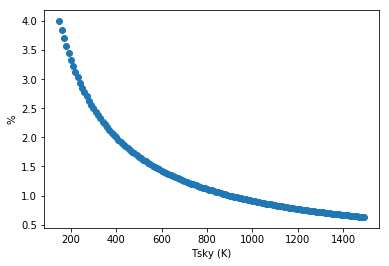

In [14]:
#How rms change because of 20K difference in Trx. 
x=np.arange(150,1500,10)
y=10/(100+x)*100 #% of change
plt.scatter(x,y)
plt.xlabel("Tsky (K)")
plt.ylabel("%")
plt.show()